# P5 : Pipline for Vehicle Detection and Tracking

This is the project report for the 5th and final Project for Term-1. Here, I will be going through each of the project rubric points as seprate sections and include explanation with example images to better represent a state of the code pipeline

In [1]:
# importing all the libraries that will be required for this project
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog
import glob

** Prep for the pipeline**

Loading images in a list and creating a subset of first 3 images to test parameters and methods that is going to be used later in the notebook

In [13]:
# Reading vehicle and non-vehicle images and gettig a sense of the data
v_images_kitti = glob.glob('training_samples/vehicles/KITTI_extracted/*.png')
nv_images_gti = glob.glob('training_samples/non-vehicles/GTI/image*.png')

# creating a list of images to test the hog features on
v_imgs = v_images_kitti[:10]
nv_imgs = nv_images_gti[:10]

In [14]:
def plotThreeImagesInRow(image1, image2, image3, title1='image1', title2='image2', title3='image3'):
    plt.clf() # clear any previous saved data
    
    # creating layout to place three image sided-by-side with their respective title
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image1, cmap='gray')
    ax1.set_title(title1, fontsize=50)
    ax2.imshow(image2, cmap='gray')
    ax2.set_title(title2, fontsize=50)
    ax3.imshow(image3, cmap='gray')
    ax3.set_title(title3, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    
def plotTwoImageInRow(image1, image2, title1='image1', title2='image2'):
    plt.clf()
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image1, cmap='gray')
    ax1.set_title(title1, fontsize=50)
    ax2.imshow(image2, cmap='gray')
    ax2.set_title(title2, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    
#def plotFeaturesHistorgram():

In [15]:
# function for rescaling the images to a smaller resolution
def bin_spatial(img, size=(32, 32)):
    
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# function to calculate the color histogram features for the given image
def color_hist(img, nbins=32, bins_range=(0, 256)):
    
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

## 1. Histogram of Oriented Gradients (HOG)

**1.a : Explain how (and identify where in your code) you extracted HOG features from the training images. Explain how you settled on your final choice of HOG parameters.**

Following cells describe the method that extracts the HOG feature using the **hog()** method. The following values are set after experimenting with few values. I have chosen these values based on how closely they resemble the features in the original image. 

The first set of parameters captures the image features but at a top level. The second set of features captures the details in the image more granually. I will be experimenting with the classifier to see which of the two or something in between produces more accurate result keeping time delays less.

Final values for the parameter for the hog values can only be set after seeing how it made the classifier perform though.

In [19]:
# Method to extract HOG features from the given image
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

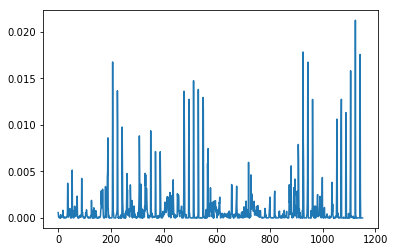

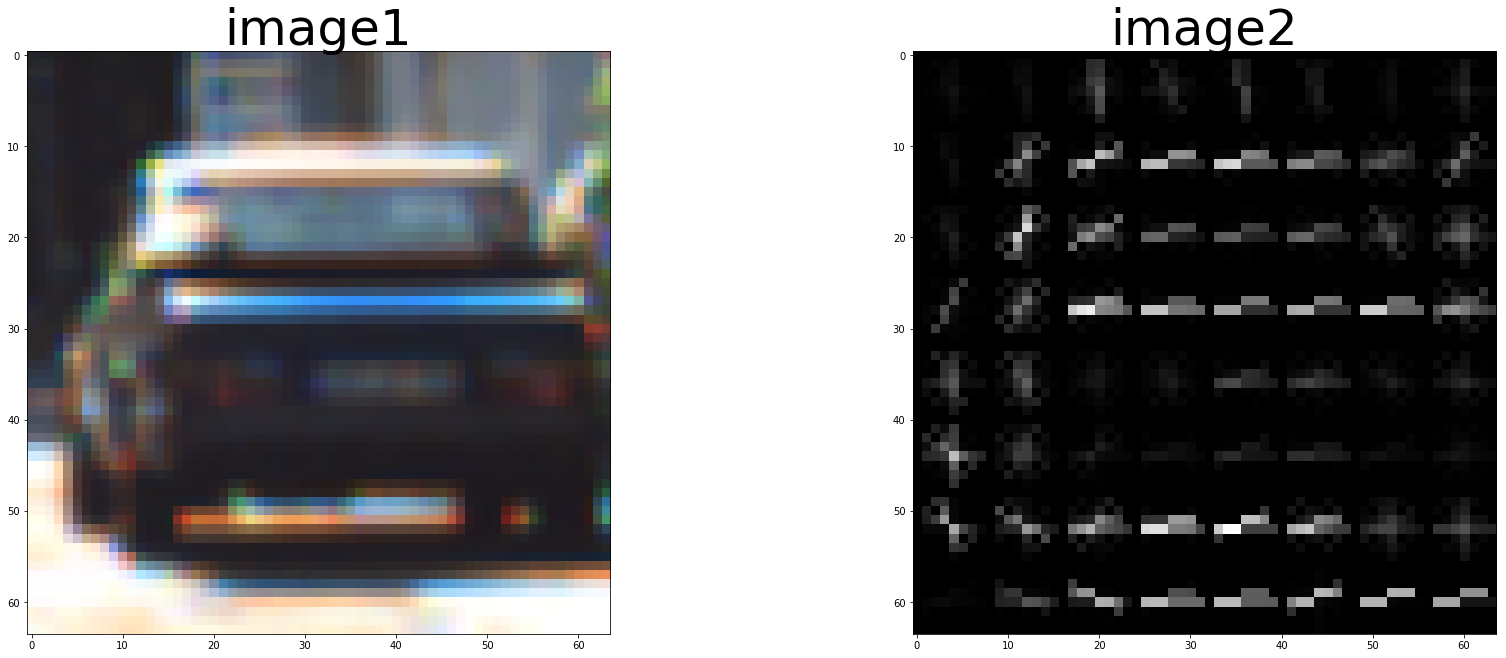

In [17]:
# testing with different parameter for extracting the hog features
hog_feature_1,hog_vis_1 = get_hog_features(test_img_v_gray, orient=18, pix_per_cell=8, cell_per_block=8, vis=True, feature_vec=True)
plt.plot(hog_feature_1)
plt.show()
plotTwoImageInRow(test_img_v, hog_vis_1)

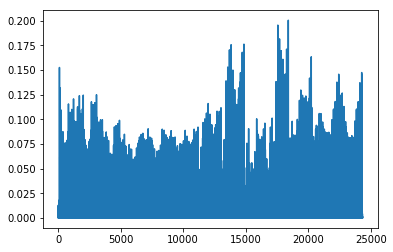

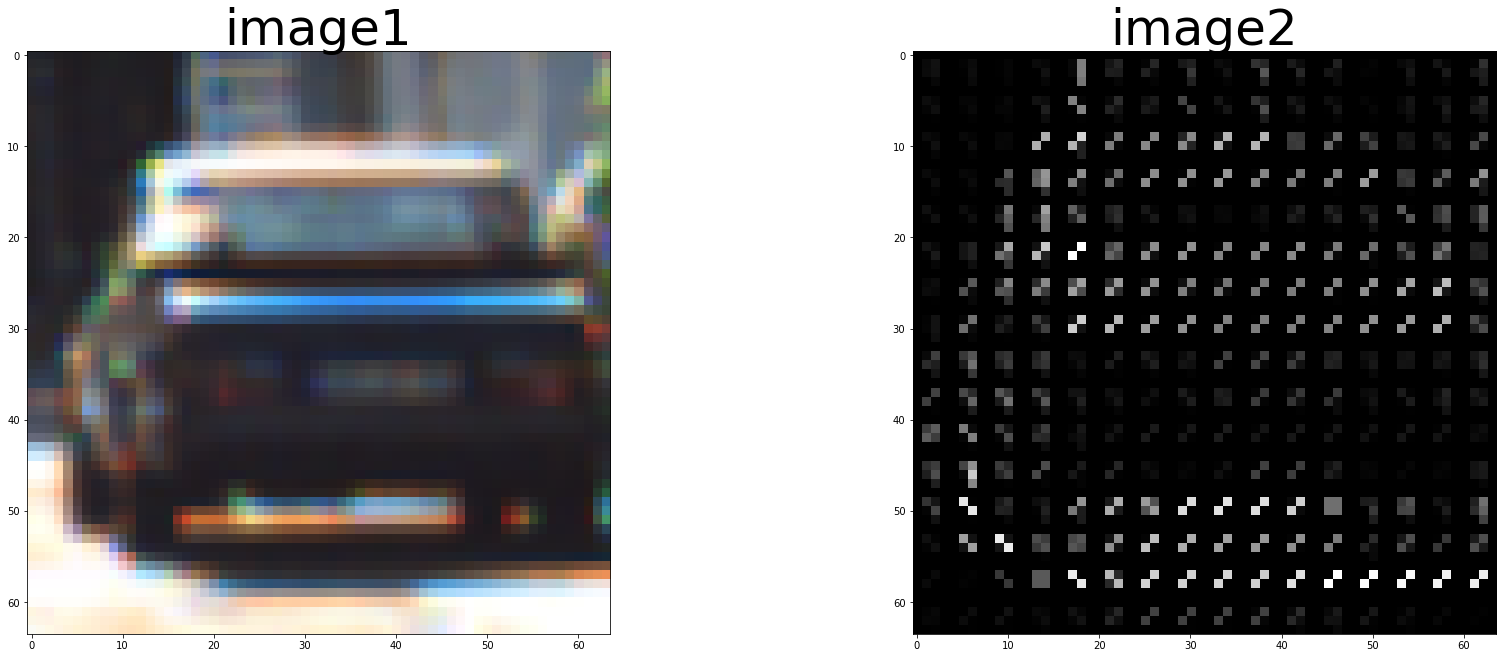

In [18]:
# Testing with more granular parameters
hog_feature_1,hog_vis_1 = get_hog_features(test_img_v_gray, orient=9, pix_per_cell=4, cell_per_block=4, vis=True, feature_vec=True)
plt.plot(hog_feature_1)
plt.show()
plotTwoImageInRow(test_img_v, hog_vis_1)

**1.b : Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them)**

In the following cells I will be writing the classifier and again testing then with different features combinations to increase the performance of the classifier